In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [186]:
hd=pd.io.parsers.read_csv('heart_disease.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [187]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,16,59,0,1,58,1,11,2,?,?,2
1,44,1,4,9,21,0,1,14,0,1,?,?,?,0
2,60,1,4,10,29,0,1,24,1,6,3,?,?,2
3,55,1,4,17,40,0,1,29,1,10,1,?,?,1
4,66,1,3,36,25,1,2,54,1,5,2,?,?,0


In [188]:
hd.target.value_counts()


1    56
0    51
3    42
2    41
4    10
Name: target, dtype: int64

In [189]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [190]:
hd.shape

(200, 14)

In [191]:
hd.describe()

,age,sex,cp,restecg,target
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [192]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [193]:
hd.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
restecg    0.391463
target     0.297393
dtype: float64

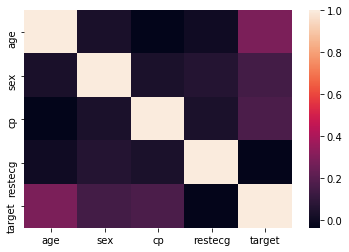

In [194]:
hd_corr=hd.corr()
sns.heatmap(hd_corr)

age           AxesSubplot(0.125,0.71587;0.133621x0.16413)
sex        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
cp          AxesSubplot(0.44569,0.71587;0.133621x0.16413)
restecg    AxesSubplot(0.606034,0.71587;0.133621x0.16413)
target     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
dtype: object

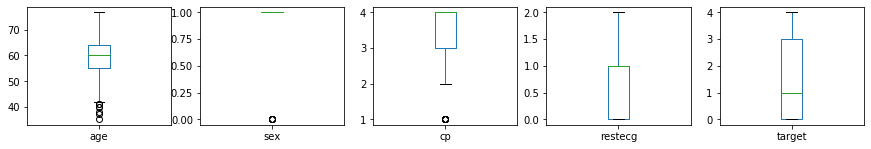

In [195]:
hd.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

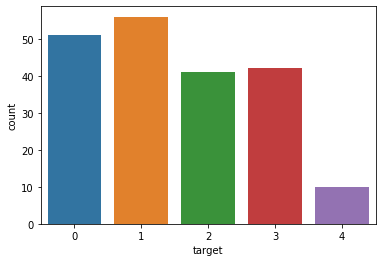

In [196]:
sns.countplot(x="target", data=hd)
plt.show()

In [197]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hd.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hd.target))*100)))

Percentage of Patients Haven't Heart Disease: 25.50%
Percentage of Patients Have Heart Disease: 28.00%


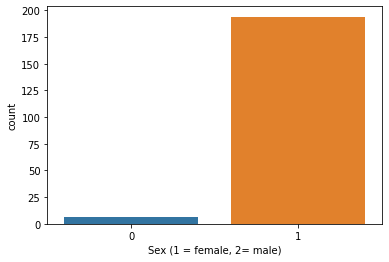

In [198]:
sns.countplot(x='sex', data=hd)
plt.xlabel("Sex (1 = female, 2= male)")
plt.show()

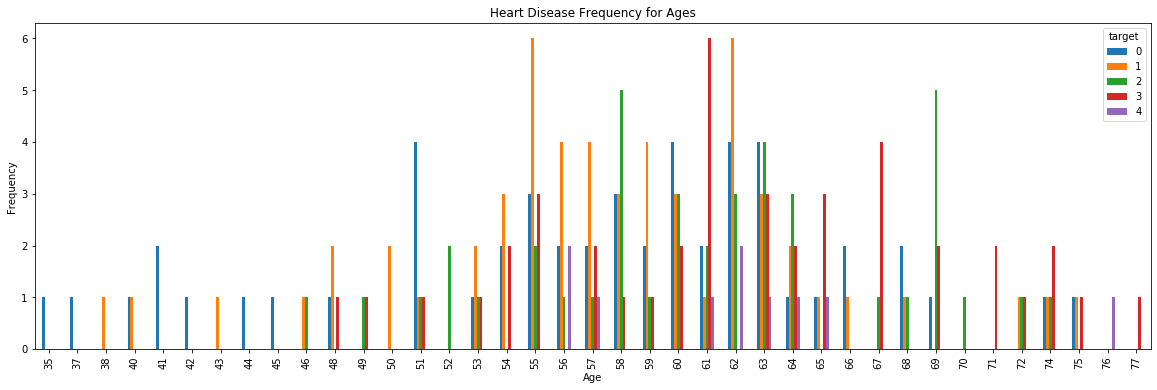

In [199]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

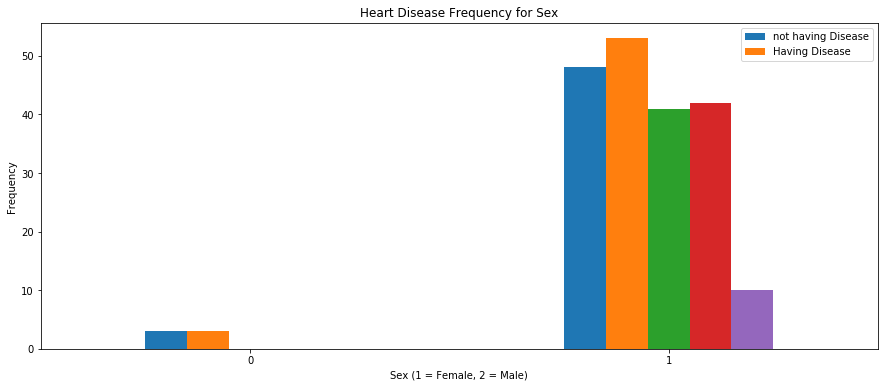

In [200]:
pd.crosstab(hd.sex,hd.target).plot(kind="bar",figsize=(15,6),)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (1 = Female, 2 = Male)')
plt.xticks(rotation=0)
plt.legend(["not having Disease", "Having Disease"])
plt.ylabel('Frequency')
plt.show()

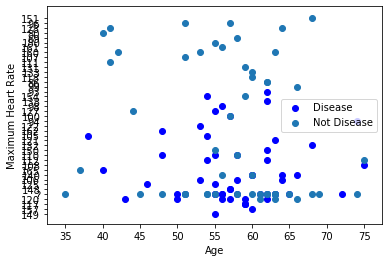

In [201]:
plt.scatter(x=hd.age[hd.target==1], y=hd.thalach[(hd.target==1)], c="blue")
plt.scatter(x=hd.age[hd.target==0], y=hd.thalach[(hd.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

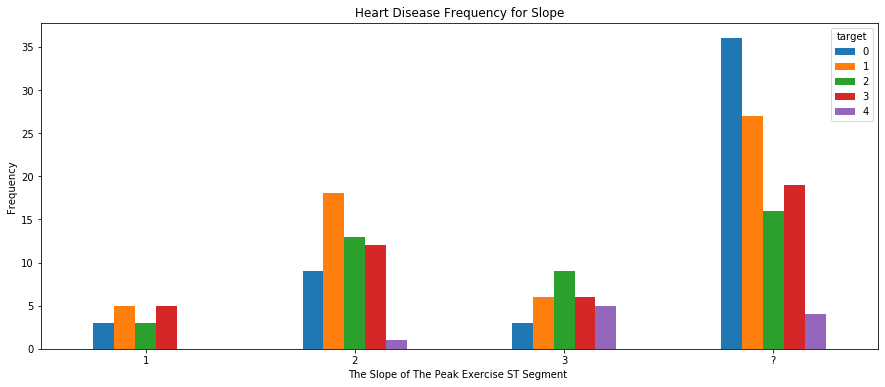

In [202]:
pd.crosstab(hd.slope,hd.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

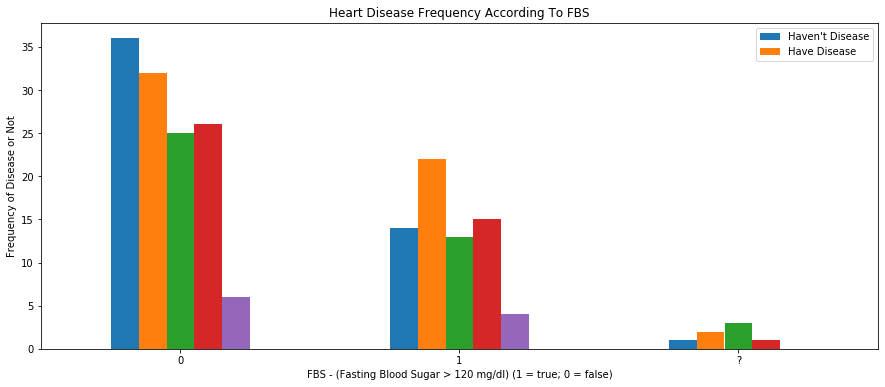

In [203]:
pd.crosstab(hd.fbs,hd.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

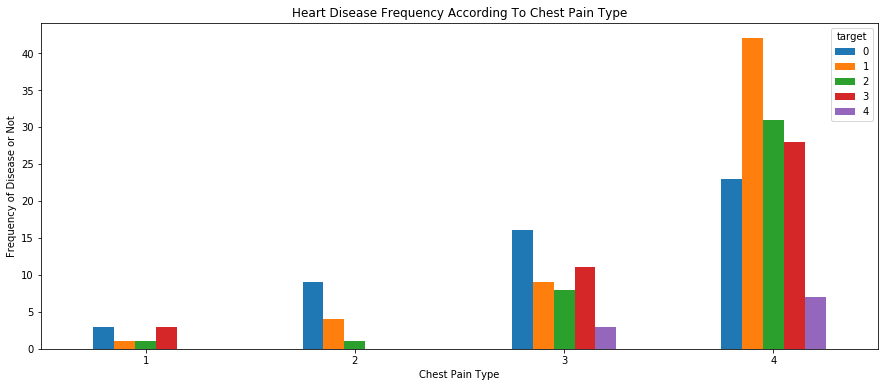

In [204]:
pd.crosstab(hd.cp,hd.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [205]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps     int32
chol         int32
fbs          int32
restecg      int64
thalach      int32
exang        int32
oldpeak      int32
slope       object
ca          object
thal        object
target       int64
dtype: object

In [206]:
df.nunique()

age          39
sex           2
cp            4
trestbps     41
chol        100
fbs           3
restecg       3
thalach      60
exang         3
oldpeak      15
slope         4
ca            2
thal          4
target        5
dtype: int64

In [208]:
column = [
'trestbps',    
'chol',    
'fbs',         
'thalach',    
'exang',       
'slope',
'ca',
'thal',]
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

age         int64
sex         int64
cp          int64
trestbps    int32
chol        int32
fbs         int32
restecg     int64
thalach     int32
exang       int32
oldpeak     int32
slope       int32
ca          int32
thal        int32
target      int64
dtype: object


In [209]:
z = np.abs(zscore(df))
print(z)

[[0.46842053 0.17586311 0.62365375 ... 0.10050378 0.40160966 0.3946109 ]
 [1.96993293 0.17586311 0.62365375 ... 0.10050378 0.40160966 1.24960118]
 [0.08341736 0.17586311 0.62365375 ... 0.10050378 0.40160966 0.3946109 ]
 ...
 [0.55825461 0.17586311 0.62365375 ... 0.10050378 2.81126765 0.3946109 ]
 [0.17325143 0.17586311 0.62365375 ... 0.10050378 0.40160966 1.24960118]
 [0.34008614 0.17586311 1.8961594  ... 0.10050378 0.40160966 0.42749514]]


In [210]:
threshold =3
print(np.where(z<3))

(array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


In [211]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.080084
chol        0.433269
fbs         0.968540
restecg     0.391463
thalach    -0.645796
exang      -0.007615
oldpeak    -0.124325
slope      -0.597696
ca         -9.923956
thal       -2.772511
target      0.297393
dtype: float64

In [218]:
skew=('age',
'sex',
'cp',
'trestbps',
'chol',
'fbs',
'restecg',
'thalach' ,
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'target')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [220]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [221]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [223]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [229]:
 #KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 37.50%


In [231]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 22.50%


C:\Users\SANIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


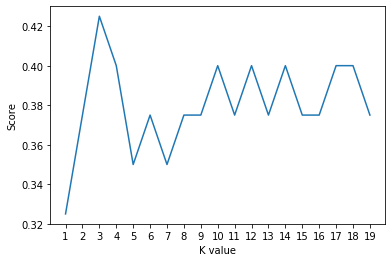

Maximum KNN Score is 42.50%


In [232]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [233]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 27.50%


In [234]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 15.00%


In [235]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 37.50%


In [236]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 37.50%


In [237]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [238]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

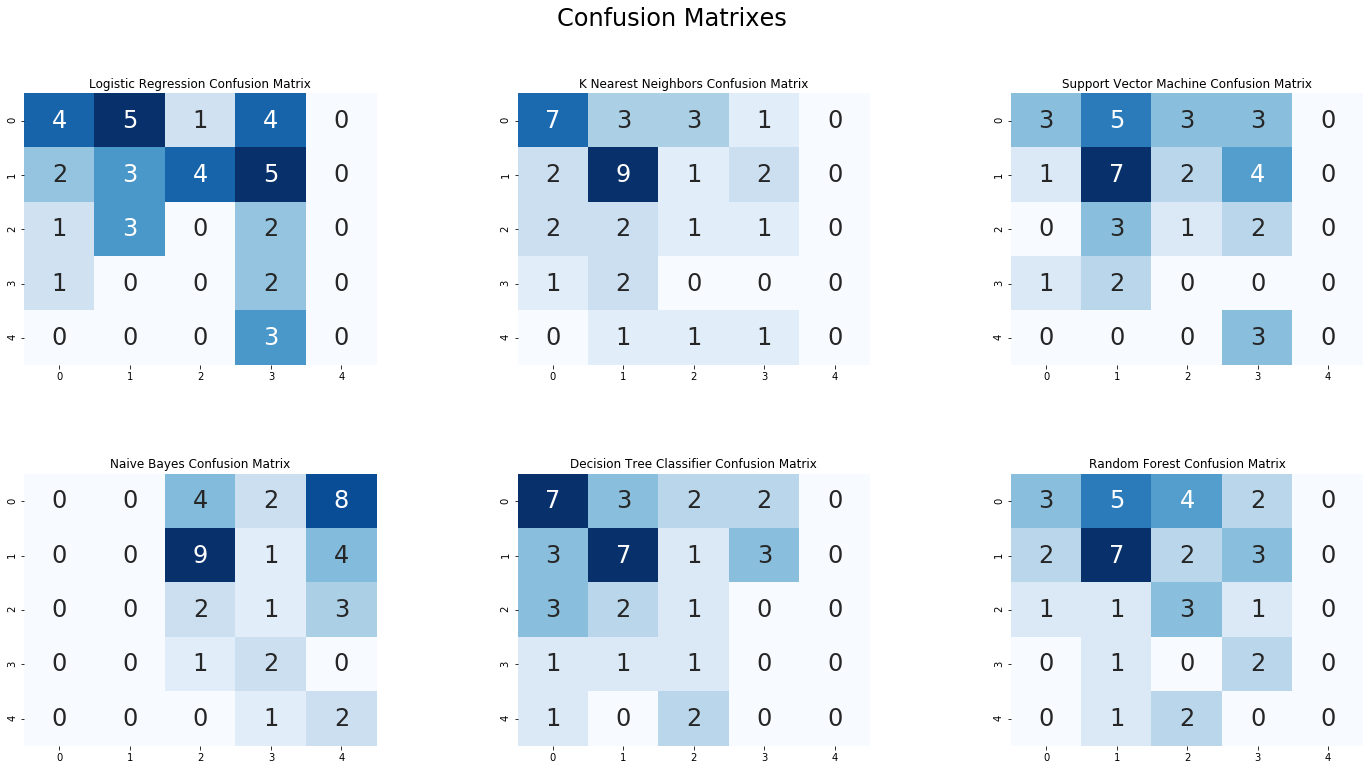

In [239]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()